In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.float_format = '{:.6f}'.format

### Study with Sparsity

In [5]:
with open('./total_result.pickle', mode='rb') as f:
    tot_results = pickle.load(f)
with open('./study.pickle', mode='rb') as f:
    study = pickle.load(f)

In [10]:
result_df = pd.DataFrame(tot_results)
mean_result_df = result_df.map(lambda x: np.mean(x))
mean_result_df

,sparseSVDfm,originalfm,NMFdeepfm,originaldeepfm,sparseNMFdeepfm,SVDdeepfm,NMFfm,sparseSVDdeepfm,SVDfm
precision,0.135138,0.449312,0.503823,0.450131,0.505152,0.509412,0.247248,0.477793,0.170336
recall,0.021630,0.080532,0.089874,0.082042,0.091329,0.092294,0.032675,0.088053,0.024798
hit_rate,0.448624,0.862959,0.897936,0.866972,0.905081,0.907917,0.596330,0.894293,0.512997
reciprocal_rank,0.238869,0.678240,0.709410,0.660387,0.709221,0.718435,0.451873,0.686842,0.309697
dcg,0.399354,1.393211,1.538361,1.377135,1.541335,1.555751,0.806211,1.456589,0.526900
threshold,0.047067,NaN,NaN,NaN,0.030610,NaN,NaN,0.037065,NaN


In [11]:
mean_result_df[['originalfm', 'originaldeepfm', 'SVDfm', 'sparseSVDfm', 'SVDdeepfm', 'sparseSVDdeepfm', 'NMFfm', 'NMFdeepfm', 'sparseNMFdeepfm',]]

,originalfm,originaldeepfm,SVDfm,sparseSVDfm,SVDdeepfm,sparseSVDdeepfm,NMFfm,NMFdeepfm,sparseNMFdeepfm
precision,0.449312,0.450131,0.170336,0.135138,0.509412,0.477793,0.247248,0.503823,0.505152
recall,0.080532,0.082042,0.024798,0.021630,0.092294,0.088053,0.032675,0.089874,0.091329
hit_rate,0.862959,0.866972,0.512997,0.448624,0.907917,0.894293,0.596330,0.897936,0.905081
reciprocal_rank,0.678240,0.660387,0.309697,0.238869,0.718435,0.686842,0.451873,0.709410,0.709221
dcg,1.393211,1.377135,0.526900,0.399354,1.555751,1.456589,0.806211,1.538361,1.541335
threshold,NaN,NaN,NaN,0.047067,NaN,0.037065,NaN,NaN,0.030610


1. `sparseSVDfm` $<$ `SVDfm` $<$ `NMFfm` $<$ `originalfm` $<$ `originaldeepfm` $<$ `sparseSVDdeepfm` $<$ `NMFdeepfm` $<$ `sparseNMFdeepfm` $<$ `SVDdeepfm` 순의 성능  
(`precision` 기준)
2. [SVD] $<$ [NMF] $<$ [original &\ deepfm] $<$ [SVD & NMF w\ deepfm]

### Checking Effects of `num_eigenvector` & `emb_dim`

In [76]:
with open('./total_result_4.pickle', mode='rb') as f:
    tot_results = pickle.load(f)
result_df = pd.DataFrame(tot_results)

In [ ]:
sorted_num = sorted([int(col[:-5]) for col in result_df.columns])
sorted_col = [str(num) + 'SVDfm' for num in sorted_num]

In [72]:
result_df = pd.concat([result_df.iloc[:, :7], result_df.iloc[:, 9:]], axis=1)
result_df

,1SVDfm,4SVDfm,5SVDfm,6SVDfm,7SVDfm,8SVDfm,8SVDfm,11SVDfm,12SVDfm,14SVDfm,...,110SVDfm,111SVDfm,112SVDfm,113SVDfm,114SVDfm,116SVDfm,117SVDfm,118SVDfm,127SVDfm,128SVDfm
precision,"[0.06926605504587156, 0.14770642201834863, 0.0...","[0.05825688073394495, 0.14036697247706423, 0.1...","[0.08990825688073395, 0.11422018348623852, 0.1...","[0.08486238532110092, 0.014678899082568808, 0....","[0.09311926605504588, 0.06834862385321101, 0.1...","[0.16834862385321103, 0.05229357798165138, 0.0...","[0.20412844036697247, 0.12935779816513762, 0.1...","[0.1908256880733945, 0.07568807339449542, 0.20...","[0.17155963302752292, 0.12844036697247707, 0.1...","[0.17385321100917434, 0.1743119266055046, 0.13...",...,"[0.1614678899082569, 0.07706422018348624, 0.17...","[0.19862385321100917, 0.11100917431192661, 0.0...","[0.19954128440366972, 0.11192660550458715, 0.1...","[0.17018348623853216, 0.18807339449541285, 0.1...","[0.20275229357798166, 0.10275229357798164, 0.1...","[0.2018348623853211, 0.1532110091743119, 0.097...","[0.2004587155963303, 0.05229357798165137, 0.15...","[0.2, 0.1642201834862385, 0.18073394495412842,...","[0.15825688073394495, 0.07477064220183485, 0.1...","[0.15091743119266057, 0.13073394495412843, 0.2..."
recall,"[0.015405547555220262, 0.0191101569269429, 0.0...","[0.008375125842005858, 0.016398610193673734, 0...","[0.011741858864165755, 0.01725312628541994, 0....","[0.008178665904200489, 0.0021007041610662516, ...","[0.007575961089095756, 0.006133487772555162, 0...","[0.02100556321455503, 0.004886342290729274, 0....","[0.027413007267691112, 0.01596565007551653, 0....","[0.028191326380521447, 0.01242074992722693, 0....","[0.02389757151297829, 0.019196143952164898, 0....","[0.025580154733452473, 0.025396109856001544, 0...",...,"[0.02423867603771246, 0.013634774301354171, 0....","[0.028116206149298426, 0.016738719673455825, 0...","[0.02758023465518942, 0.021972593645699652, 0....","[0.027344575706441956, 0.026305887474379994, 0...","[0.027424524764651525, 0.017793744685554544, 0...","[0.028789112822340028, 0.023644617256227206, 0...","[0.026823962050243965, 0.008885585019637982, 0...","[0.026365577288642715, 0.024141434003974217, 0...","[0.023429859474261572, 0.016278358696086365, 0...","[0.02232162172283063, 0.02187326187355212, 0.0..."
hit_rate,"[0.28440366972477066, 0.4793577981651376, 0.31...","[0.22018348623853212, 0.44724770642201833, 0.5...","[0.32798165137614677, 0.40825688073394495, 0.3...","[0.286697247706422, 0.06651376146788991, 0.130...","[0.286697247706422, 0.23623853211009174, 0.415...","[0.4908256880733945, 0.20642201834862386, 0.26...","[0.5619266055045872, 0.4151376146788991, 0.405...","[0.573394495412844, 0.30963302752293576, 0.584...","[0.5252293577981652, 0.46788990825688076, 0.36...","[0.5344036697247706, 0.5298165137614679, 0.493...",...,"[0.5275229357798165, 0.30963302752293576, 0.53...","[0.5756880733944955, 0.41743119266055045, 0.36...","[0.5619266055045872, 0.39908256880733944, 0.41...","[0.5481651376146789, 0.5481651376146789, 0.435...","[0.573394495412844, 0.36009174311926606, 0.552...","[0.5756880733944955, 0.5045871559633027, 0.362...","[0.5458715596330275, 0.22247706422018348, 0.50...","[0.5504587155963303, 0.5068807339449541, 0.566...","[0.5252293577981652, 0.29357798165137616, 0.45...","[0.5114678899082569, 0.463302752293578, 0.5756..."
reciprocal_rank,"[0.1418960244648318, 0.26219418960244645, 0.15...","[0.09365443425076452, 0.19105504587155966, 0.2...","[0.11831039755351681, 0.2342125382262997, 0.19...","[0.1551605504587156, 0.02779051987767584, 0.05...","[0.18000764525993884, 0.1073394495412844, 0.21...","[0.2656345565749235, 0.09430428134556575, 0.11...","[0.4102446483180428, 0.24315749235474005, 0.20...","[0.3407874617737003, 0.12817278287461772, 0.36...","[0.34816513761467893, 0.23035168195718655, 0.1...","[0.34009938837920495, 0.32614678899082566, 0.2...",...,"[0.3263379204892967, 0.11242354740061161, 0.31...","[0.40451070336391437, 0.203019877675841, 0.203...","[0.38769113149847095, 0.16918

In [92]:
# result_df = result_df[sorted_col]
# result_df
mean_result_df = result_df.map(lambda x: np.mean(x))
mean_result_df

,1SVDfm,4SVDfm,5SVDfm,6SVDfm,7SVDfm,8SVDfm,8SVDfm,11SVDfm,12SVDfm,14SVDfm,...,110SVDfm,111SVDfm,112SVDfm,113SVDfm,114SVDfm,116SVDfm,117SVDfm,118SVDfm,127SVDfm,128SVDfm
precision,0.084495,0.102110,0.080826,0.055138,0.094679,0.080183,0.150550,0.167156,0.146422,0.156239,...,0.156697,0.127431,0.142936,0.150917,0.163303,0.138624,0.147982,0.183119,0.132752,0.133211
recall,0.012421,0.013021,0.009636,0.006303,0.009769,0.008433,0.020680,0.024055,0.021344,0.024757,...,0.022488,0.020528,0.022976,0.024082,0.024815,0.021840,0.022091,0.026587,0.022374,0.021161
hit_rate,0.307798,0.334862,0.282110,0.206881,0.308716,0.270183,0.467890,0.511468,0.471560,0.497248,...,0.483028,0.442661,0.467890,0.496330,0.510092,0.439908,0.466514,0.548165,0.440826,0.451835
reciprocal_rank,0.158662,0.164625,0.132653,0.101942,0.189962,0.134671,0.276124,0.294121,0.256843,0.302760,...,0.296193,0.243570,0.244106,0.297714,0.285466,0.272439,0.276835,0.337431,0.248998,0.242492
dcg,0.245049,0.286713,0.224470,0.160335,0.298800,0.228607,0.461079,0.504094,0.433531,0.487254,...,0.487328,0.385300,0.415374,0.470867,0.486191,0.438733,0.454160,0.570121,0.403289,0.394637
exp_var,0.121849,0.210858,0.228027,0.242791,0.254291,0.265095,0.265095,0.288451,0.295169,0.307345,...,0.631764,0.634009,0.636288,0.638610,0.640794,0.645194,0.647384,0.649886,0.668782,0.670585
const_err,7.306536,6.926348,6.850587,6.784765,6.733046,6.684092,6.684092,6.577019,6.545898,6.489113,...,4.731401,4.716956,4.702252,4.687214,4.673033,4.644323,4.629965,4.613512,4.487290,4.475054


In [26]:
performance_metrics = ['precision', 'recall', 'hit_rate', 'reciprocal_rank', 'dcg']
svd_metrics = ['exp_var', 'const_err']

In [224]:
normalized_df = (mean_result_df - mean_result_df.min(axis=1).values.reshape(-1, 1)) / (mean_result_df.max(axis=1) - mean_result_df.min(axis=1)).values.reshape(-1, 1)

<Axes: >

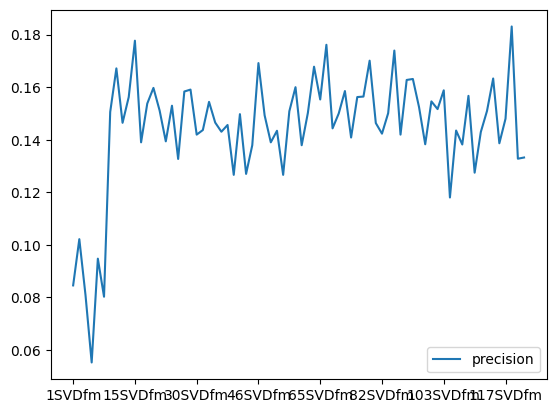

In [94]:
mean_result_df.T.plot(y='precision')

### DeepFM 확인

In [4]:
with open('./deepfm_result.pickle', mode='rb') as f:
    deep_results = pickle.load(f)
deep_df = pd.DataFrame(deep_results)

In [19]:
sorted_num = sorted([int(col[:-9]) for col in deep_df.columns])
sorted_col = [str(num) + 'SVDdeepfm' for num in sorted_num]

In [23]:
mean_deep_df = deep_df[sorted_col].map(lambda x: np.mean(x))
mean_deep_df

,1SVDdeepfm,3SVDdeepfm,4SVDdeepfm,5SVDdeepfm,8SVDdeepfm,9SVDdeepfm,11SVDdeepfm,14SVDdeepfm,15SVDdeepfm,16SVDdeepfm,...,76SVDdeepfm,80SVDdeepfm,83SVDdeepfm,84SVDdeepfm,86SVDdeepfm,87SVDdeepfm,89SVDdeepfm,92SVDdeepfm,96SVDdeepfm,97SVDdeepfm
precision,0.091101,0.112110,0.083945,0.067431,0.077615,0.090367,0.074312,0.099725,0.102477,0.103211,...,0.071284,0.064587,0.068349,0.080000,0.063211,0.074495,0.069908,0.086330,0.069083,0.078991
recall,0.014223,0.016003,0.008843,0.008808,0.008540,0.011888,0.007858,0.012041,0.013344,0.015150,...,0.009179,0.007765,0.007669,0.009564,0.007276,0.008150,0.008815,0.010850,0.008881,0.009185
hit_rate,0.324771,0.370642,0.279817,0.250000,0.277064,0.316055,0.261927,0.343578,0.358257,0.351376,...,0.263761,0.246789,0.251835,0.286697,0.229817,0.265138,0.261927,0.297706,0.267431,0.282569
reciprocal_rank,0.174541,0.205214,0.153899,0.139274,0.141330,0.165787,0.144740,0.206644,0.220352,0.201476,...,0.132722,0.128708,0.139702,0.154557,0.125268,0.146743,0.138272,0.181957,0.151904,0.145757
dcg,0.272471,0.335234,0.250130,0.207353,0.225848,0.265626,0.224669,0.316658,0.330651,0.316179,...,0.206376,0.192760,0.210417,0.240404,0.191681,0.226659,0.208757,0.275115,0.216771,0.230799
exp_var,0.121849,0.192403,0.210858,0.228027,0.265095,0.274052,0.288451,0.307345,0.313435,0.319258,...,0.544223,0.555443,0.564025,0.566579,0.572237,0.574782,0.579931,0.587750,0.598204,0.600281
const_err,7.306536,7.006873,6.926348,6.850587,6.684092,6.643235,6.577019,6.489113,6.460523,6.433066,...,5.263844,5.198648,5.148226,5.133127,5.099513,5.084318,5.053443,5.006191,4.942309,4.929514


In [84]:
mean_deep_df_T = mean_deep_df.T
mean_deep_df_T.index = mean_deep_df_T.index.map(lambda x: int(x[:-9]))
mean_deep_df_T

,precision,recall,hit_rate,reciprocal_rank,dcg,exp_var,const_err
1,0.091101,0.014223,0.324771,0.174541,0.272471,0.121849,7.306536
3,0.112110,0.016003,0.370642,0.205214,0.335234,0.192403,7.006873
4,0.083945,0.008843,0.279817,0.153899,0.250130,0.210858,6.926348
5,0.067431,0.008808,0.250000,0.139274,0.207353,0.228027,6.850587
8,0.077615,0.008540,0.277064,0.141330,0.225848,0.265095,6.684092
...,...,...,...,...,...,...,...
87,0.074495,0.008150,0.265138,0.146743,0.226659,0.574782,5.084318
89,0.069908,0.008815,0.261927,0.138272,0.208757,0.579931,5.053443
92,0.086330,0.010850,0.297706,0.181957,0.275115,0.587750,5.006191
96,0.069083,0.008881,0.267431,0.151904,0.216771,0.598204,4.942309


In [99]:
mean_deep_df_T.sort_values(by='precision', ascending=False).iloc[:10]

,precision,recall,hit_rate,reciprocal_rank,dcg,exp_var,const_err
3,0.112110,0.016003,0.370642,0.205214,0.335234,0.192403,7.006873
45,0.109174,0.015501,0.386697,0.230986,0.345967,0.444284,5.812372
16,0.103211,0.015150,0.351376,0.201476,0.316179,0.319258,6.433066
15,0.102477,0.013344,0.358257,0.220352,0.330651,0.313435,6.460523
14,0.099725,0.012041,0.343578,0.206644,0.316658,0.307345,6.489113
59,0.093028,0.010974,0.318349,0.180054,0.283664,0.492435,5.554853
1,0.091101,0.014223,0.324771,0.174541,0.272471,0.121849,7.306536
9,0.090367,0.011888,0.316055,0.165787,0.265626,0.274052,6.643235
39,0.090000,0.011569,0.330275,0.177477,0.270540,0.421714,5.929230
18,0.088440,0.012067,0.314679,0.156552,0.254363,0.330159,6.381354


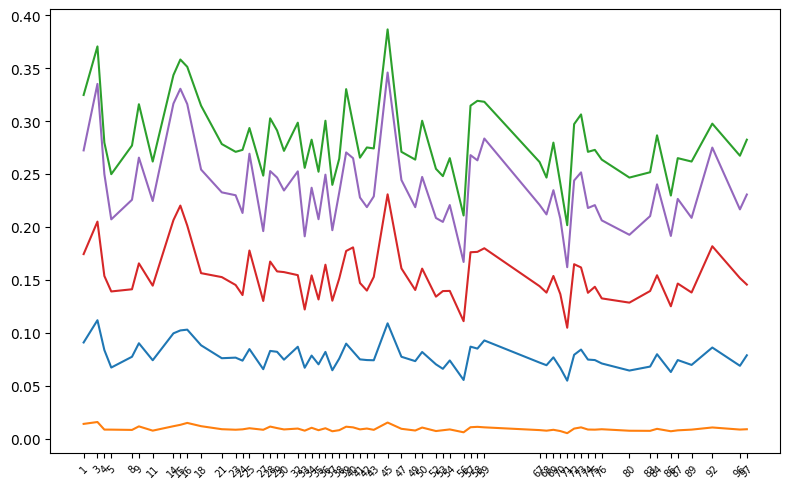

In [126]:
plt.figure(figsize=(8, 5))
plt.plot(mean_deep_df_T.index, mean_deep_df_T[performance_metrics])
plt.xticks(mean_deep_df_T.index, fontsize=7, rotation=45)
plt.tight_layout()
plt.show()

### 